In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
bl_csv= pd.read_csv(r".\raw_data.csv")
bv_csv= pd.read_csv(r"validation.csv")
bl_csv



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [62]:
bv_csv= pd.read_csv(r"validation.csv")
bv_csv

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [80]:
df = pd.DataFrame(data = bl_csv)
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


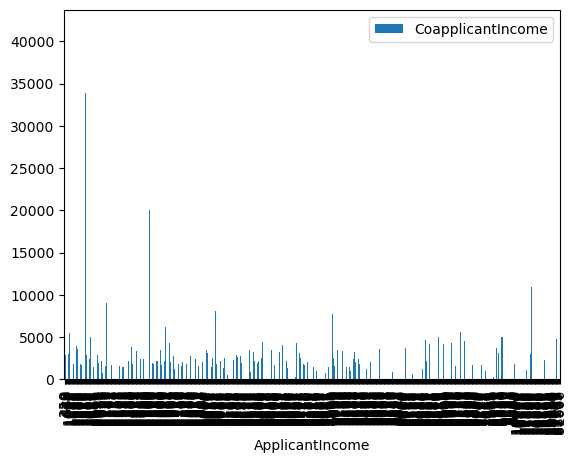

In [11]:
(
    df.sort_values(by='ApplicantIncome', ascending=True)
).plot(
    kind='bar', 
    x='ApplicantIncome', 
    y='CoapplicantIncome'
);

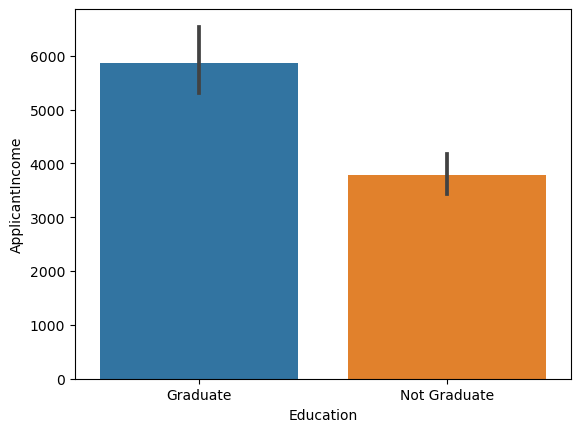

In [12]:
sns.barplot(data=df.sort_values(by='Loan_ID', ascending=True),x='Education',y='ApplicantIncome');

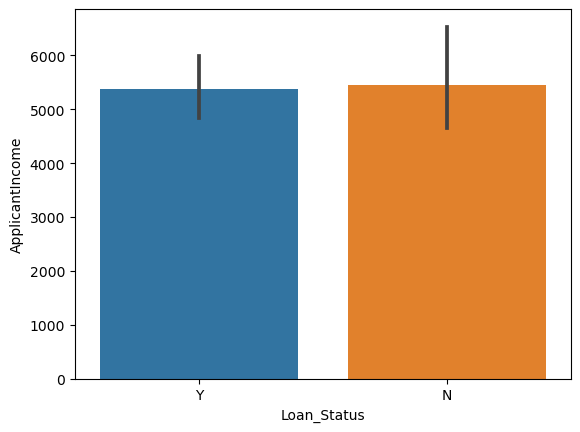

In [13]:
sns.barplot(data=df.sort_values(by='Loan_ID', ascending=True),x='Loan_Status',y='ApplicantIncome');

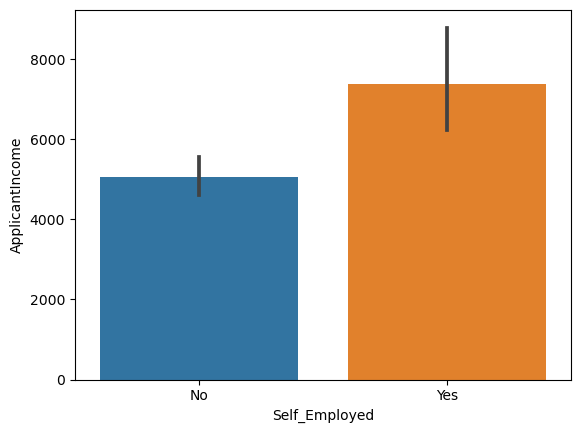

In [14]:
sns.barplot(data=df.sort_values(by='Loan_ID', ascending=True),x='Self_Employed',y='ApplicantIncome');

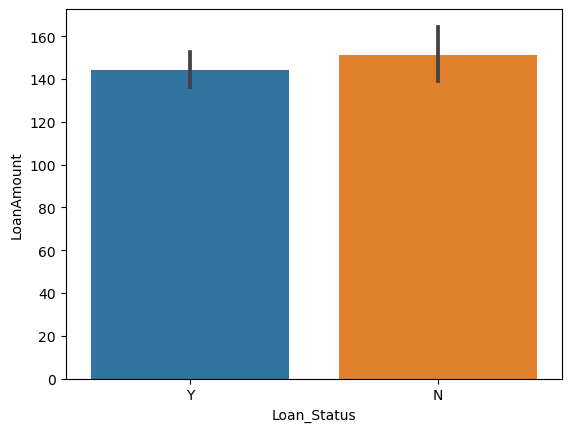

In [15]:
sns.barplot(data=df.sort_values(by='Loan_ID', ascending=True),x='Loan_Status',y='LoanAmount');

In [16]:
def pandas_entropy(column, base=None):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    base = e if base is None else base
    return -(vc * np.log(vc)/np.log(base)).sum()

In [27]:
import pandas as pd
from scipy.stats import entropy

# Assuming df is your DataFrame
for col in df.columns:
    print(f'Entropy of {col}: {entropy(df[col].value_counts(normalize=True), base=e)}')

print(entropy(df.value_counts(normalize=True), base=e))


Entropy of Loan_ID: 6.41999492814714
Entropy of Gender: 0.48089588139333894
Entropy of Married: 0.6465811991072521
Entropy of Dependents: 1.1291174740741763
Entropy of Education: 0.5246726755960811
Entropy of Self_Employed: 0.4065820843521172
Entropy of ApplicantIncome: 6.107236436206865
Entropy of CoapplicantIncome: 3.783511600286371
Entropy of LoanAmount: 4.9438862051356125
Entropy of Loan_Amount_Term: 0.6441789434605332
Entropy of Credit_History: 0.43600607982675565
Entropy of Property_Area: 1.092789563649835
Entropy of Loan_Status: 0.6212467946739648
6.173786103901938


In [64]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [81]:


df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)
df["Married"] = df["Married"].apply(lambda x: 1 if x == "Yes" else 0)
df["Education"] = df["Education"].apply(lambda x: 1 if x == "Graduate" else 0)
df["Self_Employed"] = df["Self_Employed"].apply(lambda x: 1 if x == "Yes" else 0)


In [82]:
print(df[["Gender", "Married", "Education", "Self_Employed"]])

     Gender  Married  Education  Self_Employed
0         1        0          1              0
1         1        1          1              0
2         1        1          1              1
3         1        1          0              0
4         1        0          1              0
..      ...      ...        ...            ...
609       0        0          1              0
610       1        1          1              0
611       1        1          1              0
612       1        1          1              0
613       0        0          1              1

[614 rows x 4 columns]


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "target" is the target variable
# Drop the ID column
X = df.drop(["Loan_Status", "Loan_ID"], axis=1)
y = df["Loan_Status"]

# Convert the '3+' values to a numerical format


KeyError: "['ID'] not found in axis"

In [ ]:
# Drop the ID column
X = df.drop(["Loan_Status", "ID"], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
Ydf =df["Loan_Status"]
Ydf

NameError: name 'df' is not defined

In [ ]:
Ydf =df["Loan_Status"]
if Ydf=="Y":
    Ydf


NameError: name 'df' is not defined